Написать программу для построения выравнивания алгоритмом Смита-Ватермана. Штрафы за вставки-делеции – линейные (не аффинные). Параметры – премия за совпадение m=1, штраф за замену mism=1, штраф за делецию d=1. Программа должна выдавать собственно выравнивание (последовательности, написанные друг под другом с делециями) и вес выравнивания.


Алгоритм Смита Ватермана

In [ ]:
import pandas as pd 
import numpy as np
import sys, threading
sys.setrecursionlimit(10**7) # max depth of recursion
#threading.stack_size(2**27)  # new thread will get stack of such size


def pattern(dir, i, j, seq1, seq2):
  if dir[i, j] == '':
    result = [[[], [], []]]
    return result
  
  if len(dir[i, j]) >= 1:
    pathM = []
    pathI = []
    pathU = []
    pathD = []
    
    if 'm' in dir[i, j]:
      otherPaths = pattern(dir, i-1, j-1, seq1, seq2)
      for pathSeq in otherPaths:
        pathSeq[0].append(seq1[j-1])
        pathSeq[1].append('|')
        pathSeq[2].append(seq2[i-1])
      pathM = otherPaths

    if 'u' in dir[i, j]:
      otherPaths = pattern(dir, i-1, j-1, seq1, seq2)
      for pathSeq in otherPaths:
        pathSeq[0].append(seq1[j-1])
        pathSeq[1].append(' ')
        pathSeq[2].append(seq2[i-1])
      pathU = otherPaths

    if 'i' in dir[i, j]:
      otherPaths = pattern(dir, i, j-1, seq1, seq2)
      for pathSeq in otherPaths:
        pathSeq[0].append('-')
        pathSeq[1].append(' ')
        pathSeq[2].append(seq2[i-1])  
      pathI = otherPaths

    if 'd' in dir[i, j]:
      otherPaths = pattern(dir, i-1, j, seq1, seq2)
      for pathSeq in otherPaths:
        pathSeq[0].append(seq1[j-1])
        pathSeq[1].append(' ')
        pathSeq[2].append('-')  
      pathD = otherPaths

    result = pathM + pathU + pathD + pathI
  
    return result
     

def trace_back(M,dir):
#  trace_back(M,dir)
  # trace back

  allign1 = []
  allign2 = []
  sticks = []

  idx = np.argwhere(M == np.amax(M))
  for k in range(len(idx)):
    i,j = idx[k][0],idx[k][1]


    allign1.append([[]])  # добавляем список для каждого k
    allign2.append([[]])
    sticks.append([[]])
#    for a in range(len(list(dir[i,j]))):
    for a in range(len(dir[i,j])-1):  # если len(dir)=1 (0,0)  len(dir)=2 (0,1) 

      if len(dir[i,j])>=1:
        prev_list = len(allign1[k])-1
        allign1[k].append(allign1[k][prev_list].copy())  # если это 2й путь - копируем начало предыдущего списка ДО:q (включая q??)
        allign2[k].append(allign2[k][prev_list].copy())  # КУДА ЗАПИСЫВАЮТСЯ ПОСЛЕДУЮЩИЕ ЗНАЧЕНИЯ?? ОНИ БУДУТ РАЗНЫМИ! ПОСЛЕ 2х А у нас должны остаться разные значения i и j
        sticks[k].append(sticks[k][prev_list].copy()) # МОГУТ РАСТИ В АРИФМЕТИЧЕСКОЙ ПРОГРЕССИИ, ЗДЕСЬ КАЖДЫЙ СЛЕДУЮЩИ! 2й элемент будет добавляться в тот же список!!!

      # Как итерировать после разделения списка??????????????
      while dir[i,j][a]!='':     
        if  dir[i,j][k][a]=='m':
          allign1[k][a].append(seq1[j-1])  # что тут происходит?
          allign2[k][a].append(seq2[i-1])
          sticks[k][a].append("|")
          i = i-1
          j = j-1
        elif dir[i,j][a]=='u':
          allign1[k][a].append(seq1[j-1])
          allign2[k][a].append(seq2[i-1])
          sticks[k][a].append(" ")
          i = i-1
          j = j-1
        elif dir[i,j][a]=='i':
          allign1[k][a].append('-')
          allign2[k][a].append(seq1[i])
          j = j-1
        elif dir[i,j][a]=='d':
          allign1[k][a].append(seq1[j])
          allign2[k][a].append('-')
          i = i-1

        # i,j отдельно для каждого ветвления!
# пишем в один лист, потом в другой

  return(allign1,allign2,sticks)


def Smitt_Watterman(seq1,seq2):
  seq1=seq1.replace(" ","").replace('\n',"").replace('\t','')
  seq2=seq2.replace(" ","").replace('\n',"").replace('\t','')
  # creating alignment matrixes
  col_seq1,row_seq2 = len(seq1),len(seq2)
  M = np.zeros((row_seq2+1,col_seq1+1))
  dir = np.chararray((row_seq2+1,col_seq1+1), unicode=True, itemsize=3)
  dic = []
  for i in range(0,row_seq2):
    dic.append([])
    for j in range(0,col_seq1):
      dic_dir = {'m':'', 'u':'', 'i':'', 'd':''}
      dic_dir['m'] = M[i,j]+1 if seq2[i]==seq1[j] else 0
      dic_dir['u'] =  M[i,j]-1 if (seq2[i]!=seq1[j] and M[i,j]-1>0) else 0
      dic_dir['i'] = M[i+1,j]-1 if M[i+1,j]-1>0 else 0
      dic_dir['d'] = M[i,j+1]-1 if M[i,j+1]-1>0 else 0
      max_value = max(dic_dir.values())
      M[i+1,j+1] = max(dic_dir.values())
      dir[i+1, j+1] = ''.join([k for k,v in dic_dir.items() if v == max_value]) if M[i+1,j+1]>0 else ''

  print(pd.DataFrame(dir, columns = ['']+list(seq1), index=['']+list(seq2)))
  print('\n')
  print(pd.DataFrame(M, columns = ['']+list(seq1), index=['']+list(seq2)).astype(int))

  idx = np.argwhere(M == np.amax(M))
  i,j = idx[0][0],idx[0][1]
  result = pattern(dir, i, j, seq1, seq2)
  for x in result:
    firstSeq = ''.join([k for k in x[0]])
    sticks = ''.join([k for k in x[1]])
    secondSeq = ''.join([k for k in x[2]])
    print(firstSeq)
    print(sticks)
    print(secondSeq)
    print('\n')

  # allign1,allign2,sticks=trace_back(M,dir)
  # print(allign1)
  # print(allign2)




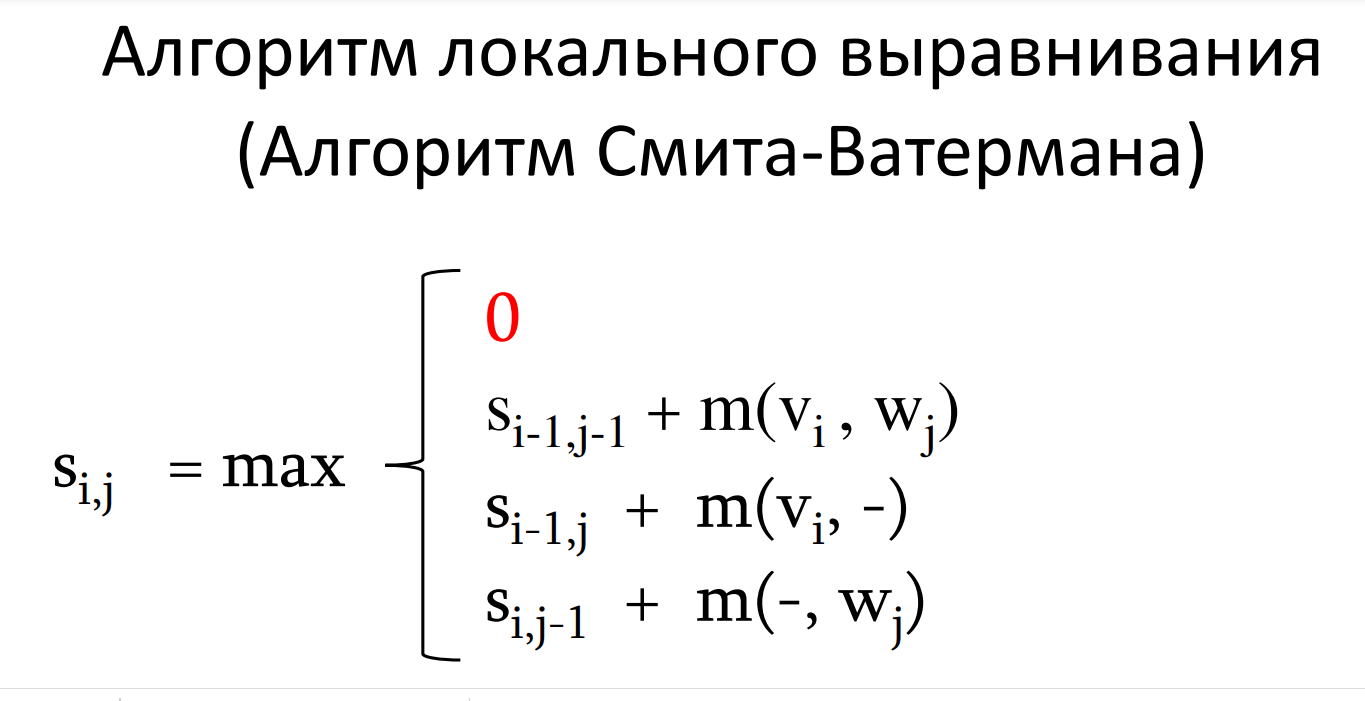

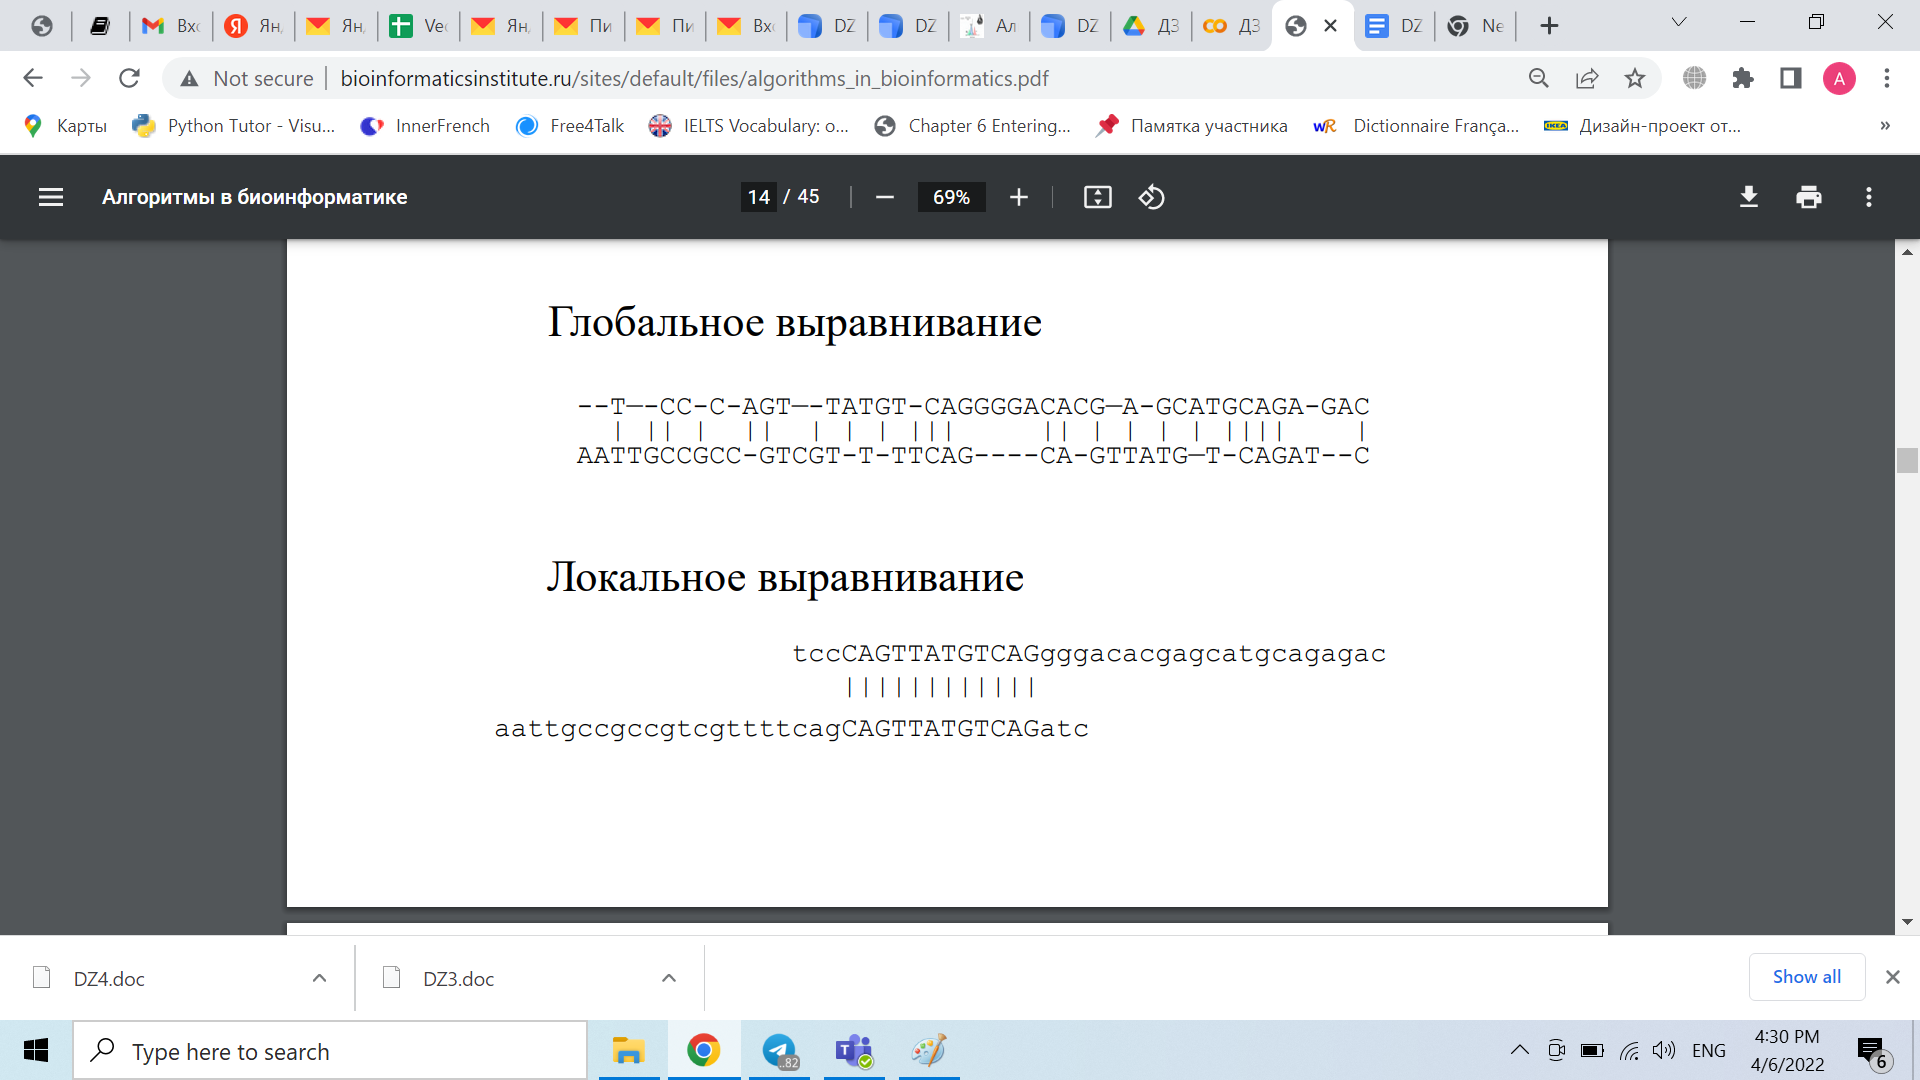

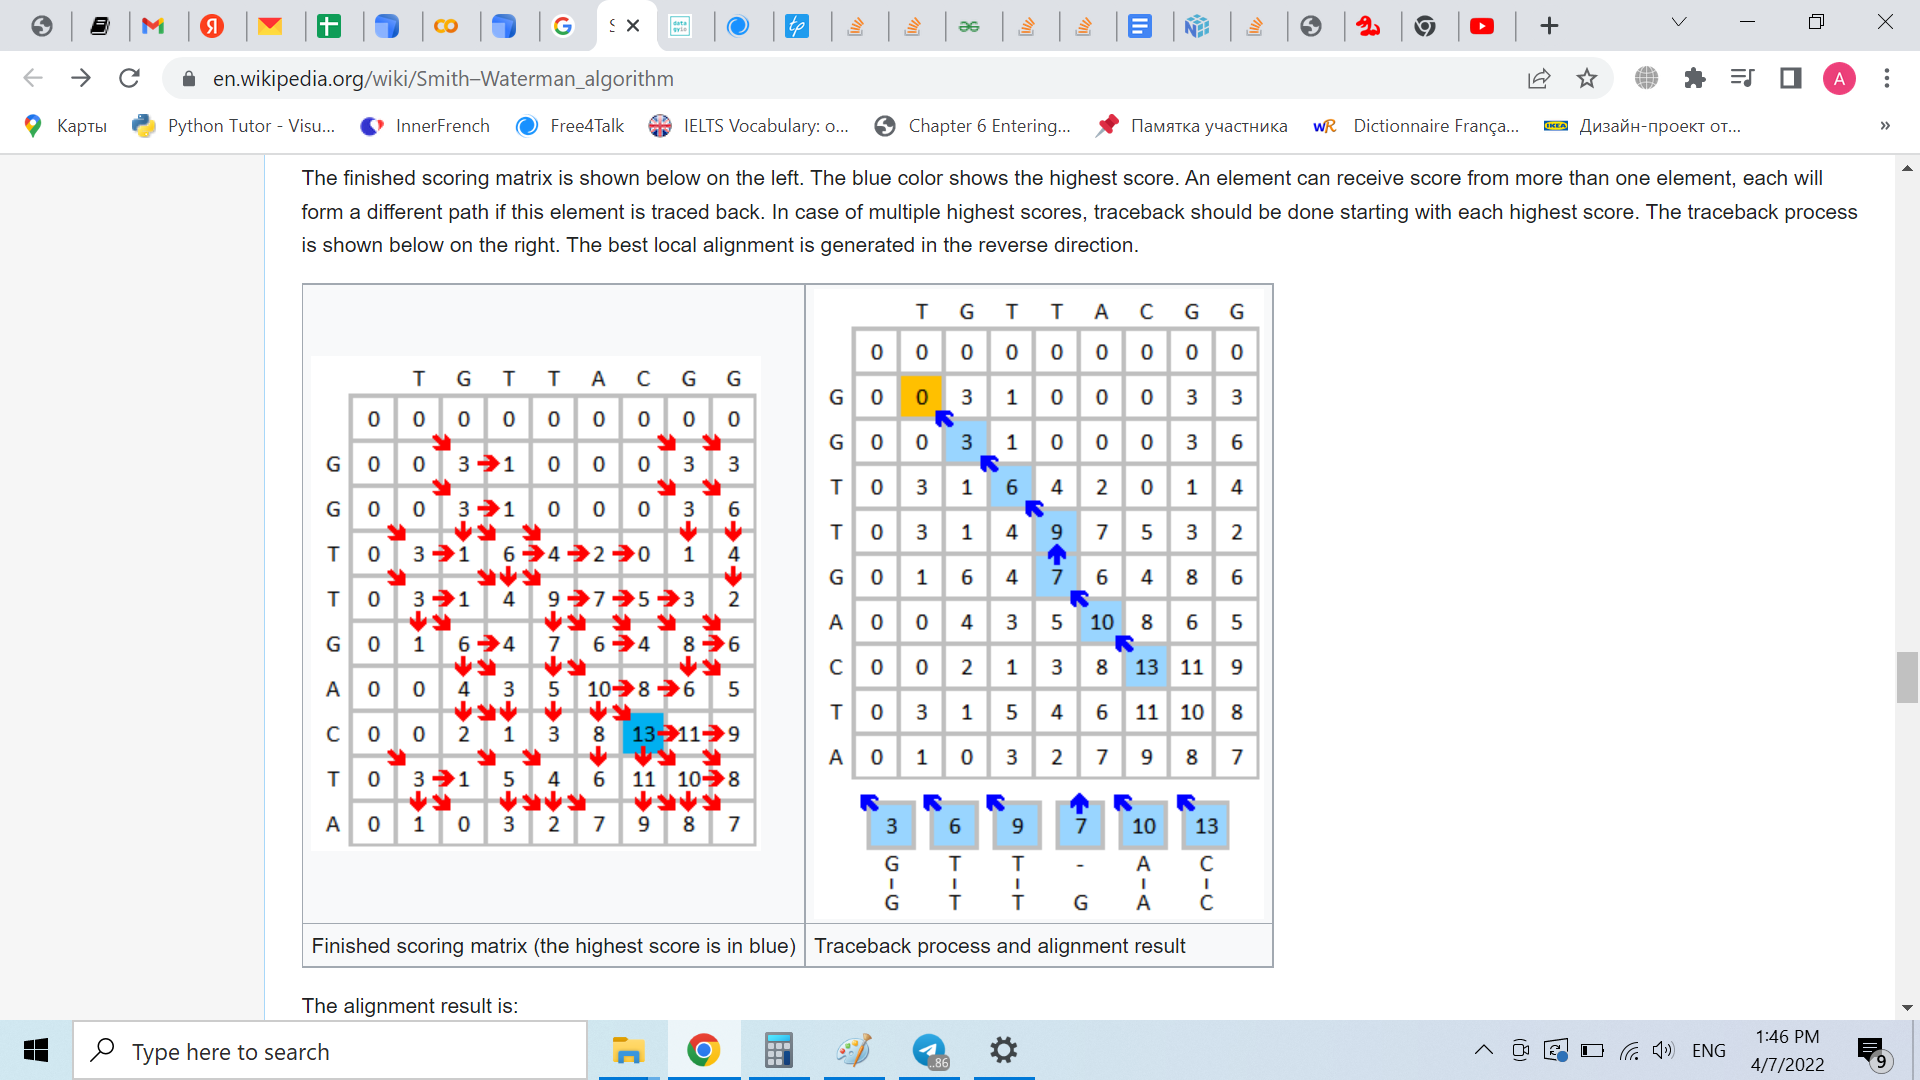

In [ ]:
import pandas as pd 
import numpy as np
import sys, threading
sys.setrecursionlimit(10**7) # max depth of recursion

def decode(dir, i, j, seq1, seq2,list1,list2,list3,p):
  if dir[i,j][p]=='m':
    i = i-1
    j = j-1
    list1.append(seq1[j])  
    list2.append(seq2[i])
    list3.append("|")

  elif dir[i,j][p]=='u':
    i = i-1
    j = j-1
    list1.append(seq1[j])
    list2.append(seq2[i])
    list3.append(" ")

  elif dir[i,j][p]=='i':
    j = j-1
    list1.append(seq1[j])
    list2.append('-')
    list3.append(" ")

  elif dir[i,j][p]=='d':
    i = i-1
    list1.append('-')
    list2.append(seq1[i])
    list3.append(" ")

  return i,j,list1,list2,list3


def trace_back(dir, i, j, seq1, seq2, allign1, allign2, sticks, list1=[], list2=[], list3=[]):
  if len(dir[i,j]) == 0:
    allign1.append(list1)
    allign2.append(list2)
    sticks.append(list3)

  elif len(dir[i,j]) == 1:
    i,j,list1,list2,list3 = decode(dir, i, j, seq1, seq2, list1, list2, list3, p=0)
    trace_back(dir, i, j, seq1, seq2, allign1, allign2, sticks, list1, list2, list3)

  elif len(dir[i,j]) > 1:
      coord=i,j
      l1 = list1.copy()
      l2 = list2.copy()
      l3 = list3.copy()
      for l in range(len(dir[i,j])):
        if l>0:
          i, j, list1,list2,list3 = decode(dir, coord[0], coord[1], seq1, seq2, l1, l2, l3, p=l)
          trace_back(dir, i, j, seq1, seq2, allign1, allign2, sticks, list1, list2, list3)
        else:
          i, j, list1,list2,list3 = decode(dir, i, j, seq1, seq2, list1, list2, list3, p=l) 
          trace_back(dir, i, j, seq1, seq2, allign1, allign2, sticks, list1, list2, list3)

  return allign1,sticks,allign2


def Smitt_Watterman(seq1,seq2):
  seq1=seq1.replace(" ","").replace('\n',"").replace('\t','')
  seq2=seq2.replace(" ","").replace('\n',"").replace('\t','')
  # creating alignment matrixes
  col_seq1,row_seq2 = len(seq1),len(seq2)
  M = np.zeros((row_seq2+1,col_seq1+1))
  dir = np.chararray((row_seq2+1,col_seq1+1), unicode=True, itemsize=3)
  dic = []
  for i in range(0,row_seq2):
    dic.append([])
    for j in range(0,col_seq1):
      dic_dir = {'m':'', 'u':'', 'i':'', 'd':''}
      dic_dir['m'] = M[i,j]+1 if seq2[i]==seq1[j] else 0
      dic_dir['u'] =  M[i,j]-1 if (seq2[i]!=seq1[j] and M[i,j]-1>0) else 0
      dic_dir['i'] = M[i+1,j]-1 if M[i+1,j]-1>0 else 0
      dic_dir['d'] = M[i,j+1]-1 if M[i,j+1]-1>0 else 0
      max_value = max(dic_dir.values())
      M[i+1,j+1] = max(dic_dir.values())
      dir[i+1, j+1] = ''.join([k for k,v in dic_dir.items() if v == max_value]) if M[i+1,j+1]>0 else ''

  # print(pd.DataFrame(dir, columns = ['']+list(seq1), index=['']+list(seq2)))
  # print('\n')
  # print(pd.DataFrame(M, columns = ['']+list(seq1), index=['']+list(seq2)).astype(int))

  idx = np.argwhere(M == np.amax(M))

  for i,j in idx:
    allign1 = []
    allign2 = []
    sticks = []
    list1=[]
    list2=[]
    list3=[]
    result = trace_back(dir, i, j, seq1, seq2, allign1, allign2, sticks, list1, list2, list3)

    for x in range(len(result[0])):
      print('\n')
      print('Score =',int(np.amax(M)))
      t = ''.join(result[0][x][::-1])
      t1 = ''.join(result[1][x][::-1])
      t2 = ''.join(result[2][x][::-1])
      if len(t)>160:
        for s in range(0, len(t), 80):
            print(t[s:s+80])
            print(t1[s:s+80])
            print(t2[s:s+80])
            print('\n')
      else:
        print(t)
        print(t1)
        print(t2)

# как это работает?

In [ ]:
seq1='''GAATTCGTCAGAAATGA'''
seq2='''GAATTCGTCAGAAATGA'''

Smitt_Watterman(seq1,seq2)



Score = 17
GAATTCGTCAGAAATGA
|||||||||||||||||
GAATTCGTCAGAAATGA


In [ ]:
seq1='''GAATTCGTCAGAAATGA'''
seq2='''ATTAGTCAGTAATG'''   # 2 делеции в начале, 1 в конце + 2 замены в 6 и 12 позициях

Smitt_Watterman(seq1,seq2)



Score = 10
ATTCGTCAGAAATG
||| ||||| ||||
ATTAGTCAGTAATG


In [ ]:
seq1='''GAATTCGTCAGAAATGA'''
seq2='''GAACGTCAGATGA'''   # делеции в 4,5 и 13,14 положении

Smitt_Watterman(seq1,seq2)

     G   A   A   T   T  C  G  T   C   A   G   A   A   A   T   G   A
                                                                   
G    m                     m              m                   m    
A        m  mi                        m       m  mi   m           m
A       md   m   i   i                m      md   m  mi   i      md
C            d   u  ui  m  i      m               d   u  ui        
G    m       d  ud   u  d  m  i   i       m       d  ud   u   m   i
T                m   m  i  d  m   i   i   i               m  id   u
C                d  ud  m  i  d   m   i   i   i   i       d   u    
A        m   m          d  u  d   d   m   i  mi  mi  mi   i       m
G    m                  d  m  i   d   d   m   i   i   i   i  mi  id
A        m  mi             d  u   d  md   d   m  mi  mi   i   i  mi
T        d   u   m  mi     d  m   i   d   d   d   u  ui   m   i   i
G    m           d   u     m  d   u   d  md   d  ud   u   d   m   i
A        m  mi                d  ud   m   d  md 

Построить график того, как меняется вес